In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
alpha=24
beta=1
u_0=alpha
u_dot_0=beta

In [107]:
k=alpha**beta

# List containing different timestamps
dt=[1,.1,.01, .001]

# Final time
t_final=5

In [108]:
def exact(t, alpha, beta):
    a = (alpha ** beta) ** 0.5
    return (alpha * np.cos(a*t)) + (beta * np.sin(a*t) / a)

In [109]:
# This list will contain arrays with errors from respective timesteps using forward diff scheme to find u[1]
error_forward = []
# This list will contain arrays with errors from respective timesteps using forward diff scheme to find u[1]
error_ghost = []

Forward diff way
Evolution of u from t=0 to t=5 with dt = 1 is shown by graph
The value of u at t=5 is 6074621.0


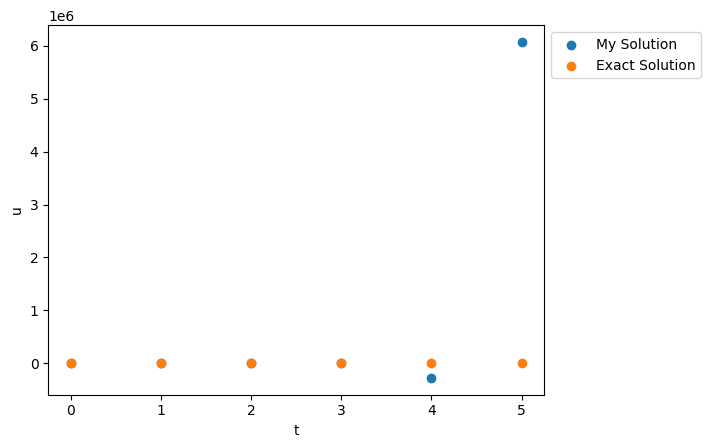

Evolution of u from t=0 to t=5 with dt = 0.1 is shown by graph
The value of u at t=5 is 19.87153590703985


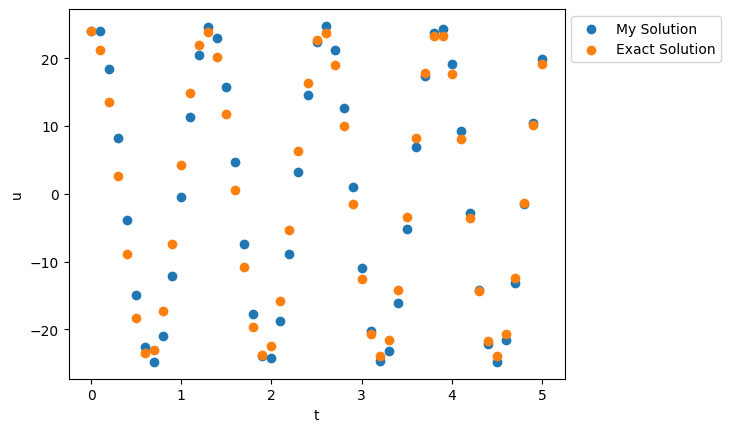

Evolution of u from t=0 to t=5 with dt = 0.01 is shown by graph
The value of u at t=5 is 18.84592549132537


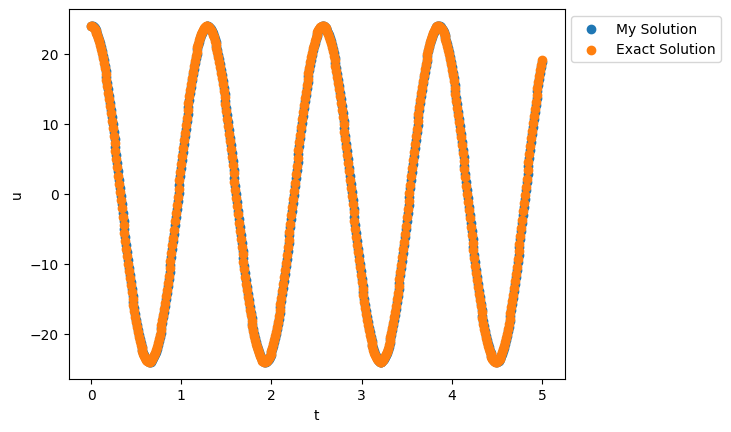

Evolution of u from t=0 to t=5 with dt = 0.001 is shown by graph
The value of u at t=5 is 19.124957588021864


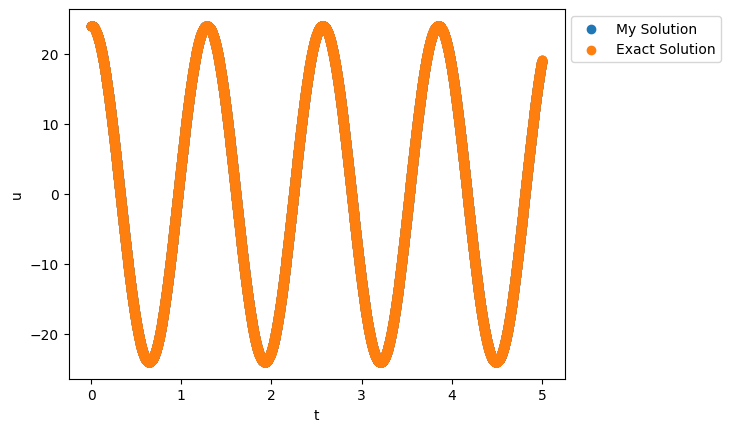

In [110]:
print("Forward diff way")

# This list contains arrays with timestamps from respective timesteps
time = []
      
for i in range(len(dt)):
    u=np.zeros(int(t_final/dt[i])+1)
    
    # Initial condition
    u[0]=u_0
    # u[1] is obtained with the help of ghost node and 2nd order scheme for d2u/dt2
    u[1]=u[0] + (u_dot_0*dt[i])

    # u[j+1] is obtained using 2nd order scheme for d2u/dt2 
    for j in range(1,int(t_final/dt[i])):
        u[j+1] = (u[j] * (2 - (k*(dt[i]**2)))) - u[j-1]
        
    t=np.linspace(0,t_final, int(t_final/dt[i])+1)
    time.append(t)
    
    u_exact = exact(t, alpha, beta)
    error_forward.append(abs(u - u_exact))
    
    print(f"Evolution of u from t=0 to t={t_final} with dt =", dt[i] , "is shown by graph")
    
    plt.scatter(t,u)
    plt.scatter(t, u_exact)
    plt.xlabel("t")
    plt.ylabel("u")
    plt.legend(['My Solution', 'Exact Solution'], bbox_to_anchor=(1,1))
    
    print(f"The value of u at t={t_final} is", u[int(t_final/dt[i])])
    plt.show()

Ghost Node way
Evolution of u from t=0 to t=5 with dt = 1 is shown by graph
The value of u at t=5 is -60973219.0


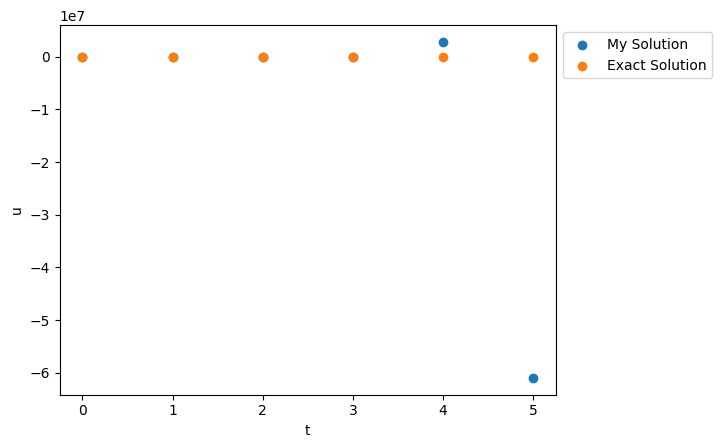

Evolution of u from t=0 to t=5 with dt = 0.1 is shown by graph
The value of u at t=5 is 22.15455102310961


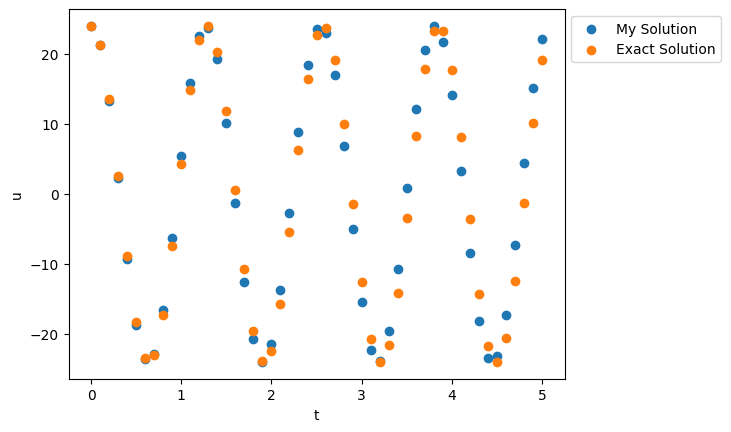

Evolution of u from t=0 to t=5 with dt = 0.01 is shown by graph
The value of u at t=5 is 19.19493222678913


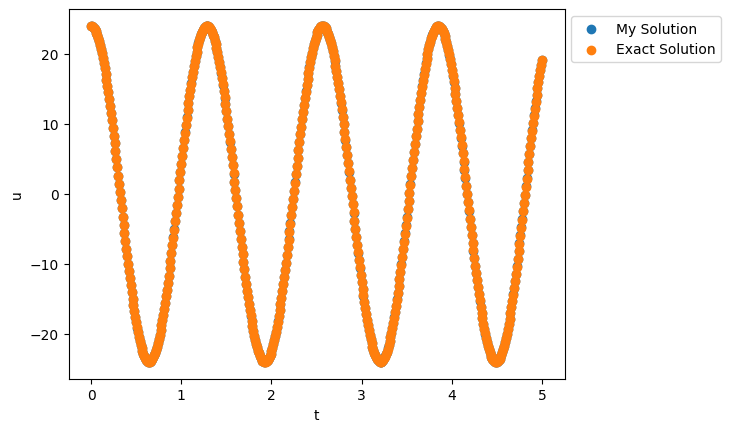

Evolution of u from t=0 to t=5 with dt = 0.001 is shown by graph
The value of u at t=5 is 19.159962561102773


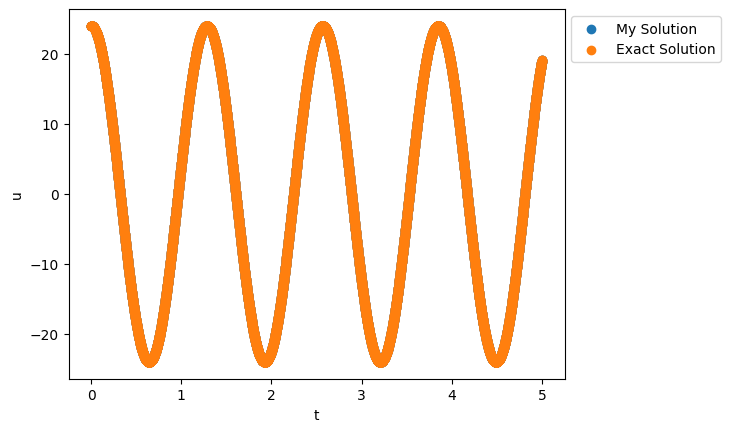

In [111]:
print("Ghost Node way")

# This list contains arrays with timestamps from respective timesteps
time = []

for i in range(len(dt)):
    u=np.zeros(int(t_final/dt[i])+1)
    
    # Initial condition
    u[0]=u_0
    # u[1] is obtained with the help of ghost node and 2nd order scheme for d2u/dt2
    u[1]=((2 - (k*(dt[i]**2))) * u[0]/2) + (u_dot_0*dt[i])

    # u[j+1] is obtained using 2nd order scheme for d2u/dt2 
    for j in range(1,int(t_final/dt[i])):
        u[j+1] = (u[j] * (2 - (k*(dt[i]**2)))) - u[j-1]
        
    t=np.linspace(0,t_final, int(t_final/dt[i])+1)
    time.append(t)
    
    u_exact = exact(t, alpha, beta)
    error_ghost.append(abs(u - u_exact))
    
    print(f"Evolution of u from t=0 to t={t_final} with dt =", dt[i] , "is shown by graph")
    
    plt.scatter(t,u)
    plt.scatter(t, u_exact)
    plt.xlabel("t")
    plt.ylabel("u")
    plt.legend(['My Solution', 'Exact Solution'], bbox_to_anchor=(1,1))
    
    print(f"The value of u at t={t_final} is", u[int(t_final/dt[i])])
    plt.show()

In [112]:
print("No of points in my solution < No of points in exact solution, denotes that respective points in my solution coincide with points in exact solution")

No of points in my solution < No of points in exact solution, denotes that respective points in my solution coincide with points in exact solution


Timestep: 1


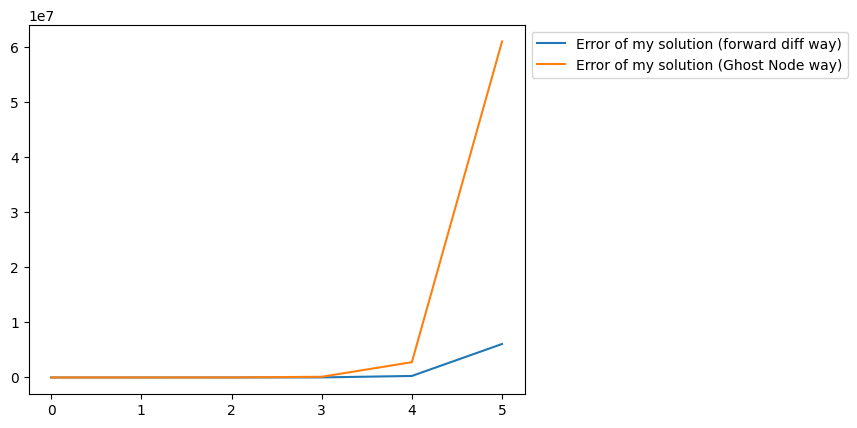

Timestep: 0.1


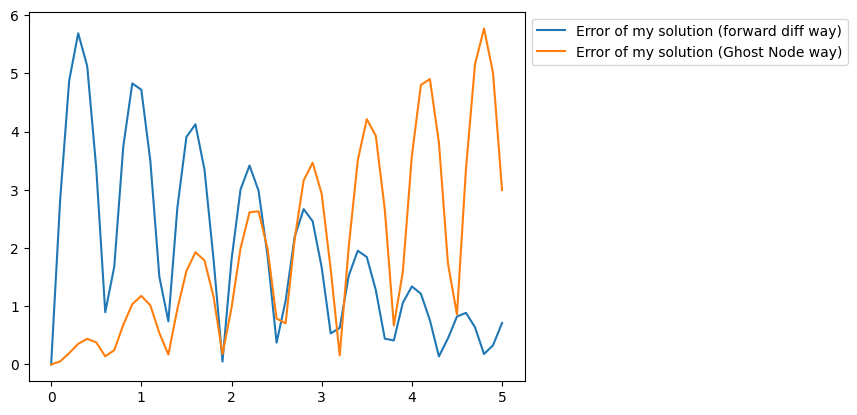

Timestep: 0.01


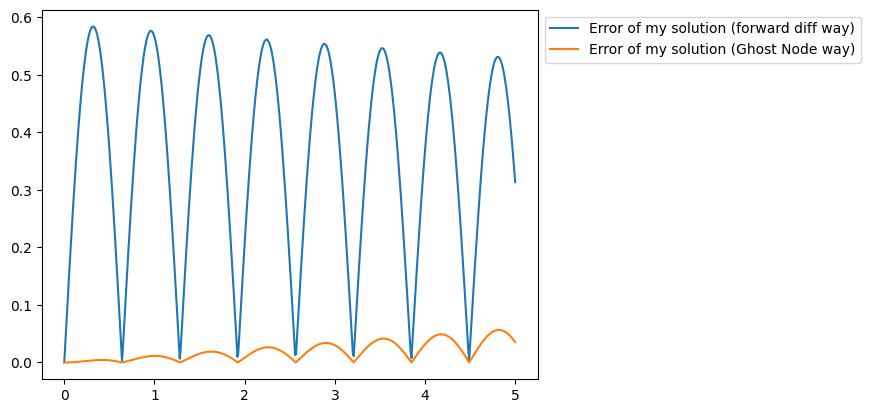

Timestep: 0.001


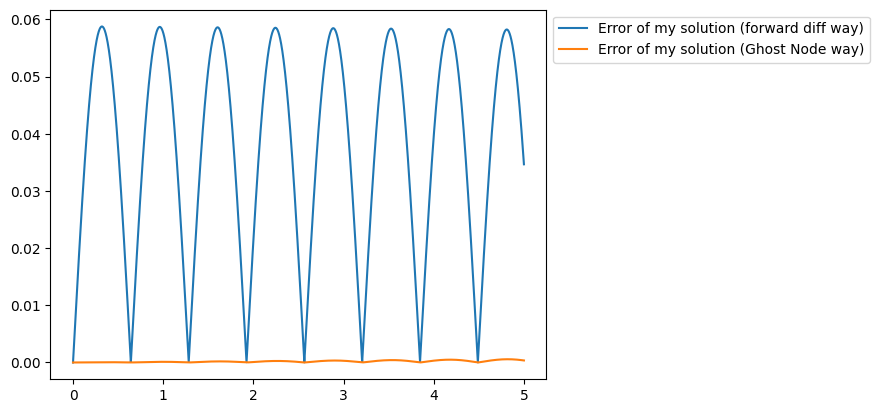

In [113]:
for i in range(len(dt)):
    print("Timestep:", dt[i])
    plt.plot(time[i], error_forward[i])
    plt.plot(time[i], error_ghost[i])
    plt.legend(['Error of my solution (forward diff way)', 'Error of my solution (Ghost Node way)'], bbox_to_anchor=(1,1))
    plt.show()

In [114]:
for i in range(len(dt)):
    print("Overall Error of my solution (forward diff way) for timestep =", dt[i], "is", np.linalg.norm(error_forward[i]))

Overall Error of my solution (forward diff way) for timestep = 1 is 6080914.01575809
Overall Error of my solution (forward diff way) for timestep = 0.1 is 17.670570238834514
Overall Error of my solution (forward diff way) for timestep = 0.01 is 8.917391400679945
Overall Error of my solution (forward diff way) for timestep = 0.001 is 2.9529713952622036


In [115]:
for i in range(len(dt)):
    print("OverallError of my solution (ghost cell way) for timestep =", dt[i], "is", np.linalg.norm(error_ghost[i]))

OverallError of my solution (ghost cell way) for timestep = 1 is 61036586.39692987
OverallError of my solution (ghost cell way) for timestep = 0.1 is 17.920862392053102
OverallError of my solution (ghost cell way) for timestep = 0.01 is 0.5519009415610653
OverallError of my solution (ghost cell way) for timestep = 0.001 is 0.01743268810893315
